**Presence and absence of heart disease**

**Introduction**
In this raw dataset, 14 variables are used to deduce whether or not a patient has heart disease from 0 (absence) and 1-4 (presence). It is known that having high blood pressure is attributed to the strongest evidence of the prevalence of heart disease (Fuchs & Whelton, 2019). Jung et. al (2022) also claims that a lower cholesterol level reduces the likelihood of developing heart disease. To find out if these hypotheses are supported, an investigation of being given a patient's cholesterol and blood pressure levels, what is the likelihood that they have heart disease?
Using the processed Cleveland dataset I will use the variables trestbps, col, and num in order to deduce and predict whether patients have heart disease, as well as what the relationship between the three variables is in contributing to the presence or absence of heart disease. 

trestbp: Resting blood pressure on admission to hospital (mm Hg)

col: Serum cholesterol (mg/dl)

num: Diagnosis of heart disease 

**Expected results** 
From previous knowledge, I expect that having a higher blood pressure and cholesterol makes it more likely for a patient to have heart disease. After knowing the relationships between the blood pressure, cholesterol, and presence/absence of heart disease, the findings can be used to determine the likelihood for a patient to have the disease, and if they need to change any aspect of their lifestyle as a form of prevention. This could also lead to questions about whether environment or culture plays a role in the development of heart disease, which can be answered by looking at data from other countries, or how effective lifestyle changes are to prevention. 

**Methods**
I have chosen to use the "trestbps" and "col" variables to predict whether or not a patient will have heart disease (column "num"). These variables were chosen because there are possibilities of having different numbers instead of ones that can only be 0 or 1, which deems them to have equal probability regardless of the classifier and thus rendering it irrelevant. In order to do so, I will create a classification model using the K-nearest neighbors model. I will also use cross-validation in order to select an appropriate K value.

First, the tidyverse and tidymodels packages are loaded in so the necessary functions can be used to visualize the data.

In [29]:
library(tidyverse)
library(tidymodels)

I set a seed so that the data can be reproduced. Next, the processed cleveland heart disease data is loaded in and saved as a URL, then read in as a csv file. Column names were added to make the columns more recognizable, as opposed to having them numbered.

In [30]:
set.seed(1000)
url <- "https://github.com/UBC-DSCI/dsci-100-project_template/raw/main/data/heart_disease/processed.cleveland.data"
cleveland_all <- read_csv(url, col_names = c("age","sex","cp","trestbps","chol","fbs","restecg",
                                         "thalach","exang","oldpeak","slope","ca","thal","num"))
cleveland_all

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca  thal
1   63  1   1  145      233  1   2       150     0     2.3     3     0.0 6.0 
2   67  1   4  160      286  0   2       108     1     1.5     2     3.0 3.0 
3   67  1   4  120      229  0   2       129     1     2.6     2     2.0 7.0 
4   37  1   3  130      250  0   0       187     0     3.5     3     0.0 3.0 
5   41  0   2  130      204  0   2       172     0     1.4     1     0.0 3.0 
6   56  1   2  120      236  0   0       178     0     0.8     1     0.0 3.0 
7   62  0   4  140      268  0   2       160     0     3.6     3     2.0 3.0 
8   57  0   4  120      354  0   0       163     1     0.6     1     0.0 3.0 
9   63  1   4  130      254  0   2       147     0     1.4     2     1.0 7.0 
10  53  1   4  140      203  1   2       155     1     3.1     3     0.0 7.0 
11  57  1   4  140      192  0   0       148     0     0.4     2     0.0 6.0 
12  56  0   2  140      294  0   2       153     0     1.3     2     0.0 3.0 
13  56  1   3  130      256  1   2       142     1     0.6     2     1.0 6.0 
14  44  1   2  120      263  0   0       173     0     0.0     1     0.0 7.0 
15  52  1   3  172      199  1   0       162     0     0.5     1     0.0 7.0 
16  57  1   3  150      168  0   0       174     0     1.6     1     0.0 3.0 
17  48  1   2  110      229  0   0       168     0     1.0     3     0.0 7.0 
18  54  1   4  140      239  0   0       160     0     1.2     1     0.0 3.0 
19  48  0   3  130      275  0   0       139     0     0.2     1     0.0 3.0 
20  49  1   2  130      266  0   0       171     0     0.6     1     0.0 3.0 
21  64  1   1  110      211  0   2       144     1     1.8     2     0.0 3.0 
22  58  0   1  150      283  1   2       162     0     1.0     1     0.0 3.0 
23  58  1   2  120      284  0   2       160     0     1.8     2     0.0 3.0 
24  58  1   3  132      224  0   2       173     0     3.2     1     2.0 7.0 
25  60  1   4  130      206  0   2       132     1     2.4     2     2.0 7.0 
26  50  0   3  120      219  0   0       158     0     1.6     2     0.0 3.0 
27  58  0   3  120      340  0   0       172     0     0.0     1     0.0 3.0 
28  66  0   1  150      226  0   0       114     0     2.6     3     0.0 3.0 
29  43  1   4  150      247  0   0       171     0     1.5     1     0.0 3.0 
30  40  1   4  110      167  0   2       114     1     2.0     2     0.0 7.0 
⋮   ⋮   ⋮   ⋮  ⋮        ⋮    ⋮   ⋮       ⋮       ⋮     ⋮       ⋮     ⋮   ⋮   
274 71  0   4  112      149  0   0       125     0     1.6     2     0.0 3.0 
275 59  1   1  134      204  0   0       162     0     0.8     1     2.0 3.0 
276 64  1   1  170      227  0   2       155     0     0.6     2     0.0 7.0 
277 66  0   3  146      278  0   2       152     0     0.0     2     1.0 3.0 
278 39  0   3  138      220  0   0       152     0     0.0     2     0.0 3.0 
279 57  1   2  154      232  0   2       164     0     0.0     1     1.0 3.0 
280 58  0   4  130      197  0   0       131     0     0.6     2     0.0 3.0 
281 57  1   4  110      335  0   0       143     1     3.0     2     1.0 7.0 
282 47  1   3  130      253  0   0       179     0     0.0     1     0.0 3.0 
283 55  0   4  128      205  0   1       130     1     2.0     2     1.0 7.0 
284 35  1   2  122      192  0   0       174     0     0.0     1     0.0 3.0 
285 61  1   4  148      203  0   0       161     0     0.0     1     1.0 7.0 
286 58  1   4  114      318  0   1       140     0     4.4     3     3.0 6.0 
287 58  0   4  170      225  1   2       146     1     2.8     2     2.0 6.0 
288 58  1   2  125      220  0   0       144     0     0.4     2     ?   7.0 
289 56  1   2  130      221  0   2       163     0     0.0     1     0.0 7.0 
290 56  1   2  120      240  0   0       169     0     0.0     3     0.0 3.0 
291 67  1   3  152      212  0   2       150     0     0.8     2     0.0 7.0 
292 55  0   2  132      342  0   0       166     0     1.2     1     0.0 3.0 
293 44  1   4  120      16

**Table 1** Comprehensive Cleveland dataset

The data is cleaned by creating names for every column, then selecting the relevant columns that I'm interested in (trestbps, chol, and num). Since the original dataset had the num category as numbers from 0-4, I instead recoded it by renaming rows with 0 as "absence" and 1-4 as "presence" using the mutate function. This way, when we use our classification model it will just give us if there is a presence or absence of heart disease and reduce any possible confusion.

In [31]:
set.seed(1000)
cleveland <- cleveland_all |>
select(trestbps, chol, num) |>
    mutate(num = as_factor(num)) |>
     mutate(num = fct_recode(num, "presence" = "1", "presence" = "2", "presence" = "3", "presence" = "4", "absence" = "0"))

cleveland

trestbps chol num     
1   145      233  absence 
2   160      286  presence
3   120      229  presence
4   130      250  absence 
5   130      204  absence 
6   120      236  absence 
7   140      268  presence
8   120      354  absence 
9   130      254  presence
10  140      203  presence
11  140      192  absence 
12  140      294  absence 
13  130      256  presence
14  120      263  absence 
15  172      199  absence 
16  150      168  absence 
17  110      229  presence
18  140      239  absence 
19  130      275  absence 
20  130      266  absence 
21  110      211  absence 
22  150      283  absence 
23  120      284  presence
24  132      224  presence
25  130      206  presence
26  120      219  absence 
27  120      340  absence 
28  150      226  absence 
29  150      247  absence 
30  110      167  presence
⋮   ⋮        ⋮    ⋮       
274 112      149  absence 
275 134      204  presence
276 170      227  absence 
277 146      278  absence 
278 138      220  absence 
279 154      232  presence
280 130      197  absence 
281 110      335  presence
282 130      253  absence 
283 128      205  presence
284 122      192  absence 
285 148      203  presence
286 114      318  presence
287 170      225  presence
288 125      220  absence 
289 130      221  absence 
290 120      240  absence 
291 152      212  presence
292 132      342  absence 
293 120      169  presence
294 140      187  presence
295 124      197  presence
296 120      157  absence 
297 164      176  presence
298 140      241  presence
299 110      264  presence
300 144      193  presence
301 130      131  presence
302 130      236  presence
303 138      175  absence

 I have cleaned the data so that all the unknown values were filtered out, and only the three columns I'm interested in remain. Then, I split the data into training and testing sets, which I will use to predict the presence or absence of heart disease by creating a recipe and a workflow. This data is scaled so that either chol or trestbp variables don't outweigh the other in terms of obtaining a result.

In [74]:
set.seed(1000)
cleveland_split <- initial_split(cleveland_scaled, prop = 0.75, strata = num)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

glimpse(cleveland_train)

Rows: 170
Columns: 3
$ chol     <dbl> -0.24540964, -0.77788548, 1.97629988, 0.87462573, -1.43888996…
$ trestbps <dbl> 0.7901583, -0.1231102, -0.7319558, 0.4857354, 1.0945811, 0.48…
$ num      <fct> absence, absence, absence, absence, absence, absence, absence…


In [75]:
set.seed(1000)
cleveland_recipe <- recipe(num ~ chol + trestbps, data = cleveland_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors()) |>
  prep()

cleveland_scaled <- bake(cleveland_recipe, cleveland_train)
cleveland_scaled

chol        trestbps    num     
1   -0.24512629  0.7269721  absence 
2   -0.74991853 -0.1835283  absence 
3    1.86107579 -0.7905286  absence 
4    0.81667807  0.4234720  absence 
5   -1.37655716  1.0304723  absence 
6   -0.14068652  0.4234720  absence 
7    0.48595212 -0.1835283  absence 
8   -0.48881909 -0.7905286  absence 
9    1.61738299 -0.7905286  absence 
10  -0.36697269  1.0304723  absence 
11  -0.36697269  0.4234720  absence 
12  -0.07106000  1.0304723  absence 
13  -0.61066550  1.0304723  absence 
14   2.95769341  0.4234720  absence 
15  -0.87176493 -0.1835283  absence 
16  -0.85435830 -1.7010290  absence 
17   0.45113886 -0.4870285  absence 
18  -0.59325887 -0.4870285  absence 
19  -1.21989750  0.5448720  absence 
20   0.99074435  0.1199718  absence 
21  -0.26253292  1.0304723  absence 
22   1.96551557  1.6374725  absence 
23  -0.03624674 -0.1835283  absence 
24   0.29447920 -0.1835283  absence 
25   1.28665704  0.4234720  absence 
26   0.17263280  0.3020719  absence 
27  -0.22771966  0.3020719  absence 
28   0.15522617 -0.1835283  absence 
29  -0.27993955 -0.1835283  absence 
30  -1.84653614 -1.5189290  absence 
⋮   ⋮           ⋮           ⋮       
141  0.45113886  1.63747254 presence
142  1.07777750  0.54487202 presence
143  0.20744606 -0.30492838 presence
144 -0.05365337  1.03047225 presence
145 -0.27993955 -0.79052861 presence
146 -0.33215943  2.73007305 presence
147 -0.71510527 -1.39752889 presence
148  1.39109682  2.85147311 presence
149 -1.70728311 -0.91192867 presence
150 -0.22771966  0.05927179 presence
151 -0.17549978 -0.79052861 presence
152  0.48595212 -1.39752889 presence
153 -0.61066550 -0.48702847 presence
154  0.24225932 -0.54772849 presence
155 -1.41137042  0.30207191 presence
156 -0.74991853 -0.30492838 presence
157 -0.50622572 -0.42632844 presence
158 -0.41919258  1.15187231 presence
159 -0.69769864  0.42347196 presence
160  1.11259076  0.42347196 presence
161 -0.74991853  0.05927179 presence
162 -0.26253292  1.27327237 presence
163 -0.76732515  0.90907219 presence
164 -0.61066550  1.15187231 presence
165 -1.35915053 -0.79052861 presence
166 -1.04583122  0.42347196 presence
167 -0.87176493 -0.54772849 presence
168 -1.23730413  1.88027265 presence
169 -0.10587326  0.42347196 presence
170 -2.02060243 -0.18352832 presence

**Table 2** Cleaned Cleveland dataset

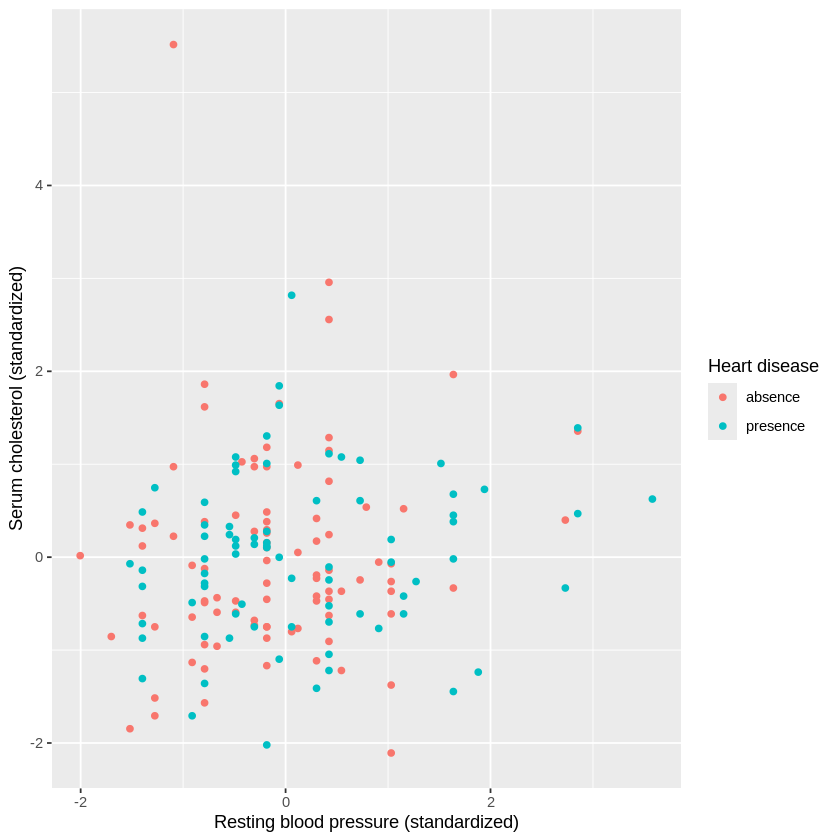

In [76]:
set.seed(1000)
cleveland_plot_standardized <- cleveland_scaled |>
    ggplot(aes(x = trestbps, y = chol, color = num)) +
    geom_point() +
    labs(x = "Resting blood pressure (standardized)", y = "Serum cholesterol (standardized)", color = "Heart disease")

cleveland_plot_standardized

**Figure 1** Absence and presence of heart disease based on scaled serum cholesterol and resting blood pressure values. 

Since we don't know the appropriate K value to take to get the most accurate result, we will use 5-fold cross-validation to obtain the best K value. To do this, we can use the neighbors variable to pick out values from 1 to 50 in increments of 5. I picked 50 so that the range was still pretty wide, and got a good look at the different accuracies from each variable.

In [77]:
set.seed(1000)
cleveland_vfold <- vfold_cv(cleveland_train, v = 5, strata = num)

k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 5))

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_results <- workflow() |>
    add_recipe(cleveland_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = cleveland_vfold, grid = k_vals) |>
    collect_metrics()

accuracies <- knn_results |>
  filter(.metric == "accuracy")
accuracies

neighbors .metric  .estimator mean      n std_err    .config              
1   1        accuracy binary     0.4625974 5 0.04628586 Preprocessor1_Model01
2   6        accuracy binary     0.5351362 5 0.02805807 Preprocessor1_Model02
3  11        accuracy binary     0.5287395 5 0.02752495 Preprocessor1_Model03
4  16        accuracy binary     0.5701146 5 0.03079642 Preprocessor1_Model04
5  21        accuracy binary     0.5529615 5 0.04315208 Preprocessor1_Model05
6  26        accuracy binary     0.5820576 5 0.03543978 Preprocessor1_Model06
7  31        accuracy binary     0.5590425 5 0.03289862 Preprocessor1_Model07
8  36        accuracy binary     0.5181716 5 0.03643596 Preprocessor1_Model08
9  41        accuracy binary     0.4883932 5 0.04203658 Preprocessor1_Model09
10 46        accuracy binary     0.4719328 5 0.05298124 Preprocessor1_Model10

**Table 3** Accuracy measurement of training set.

Putting this data in a graph, it is clear that picking out a K value of 26 results in the highest accuracy of around 58%. 

[1] 26

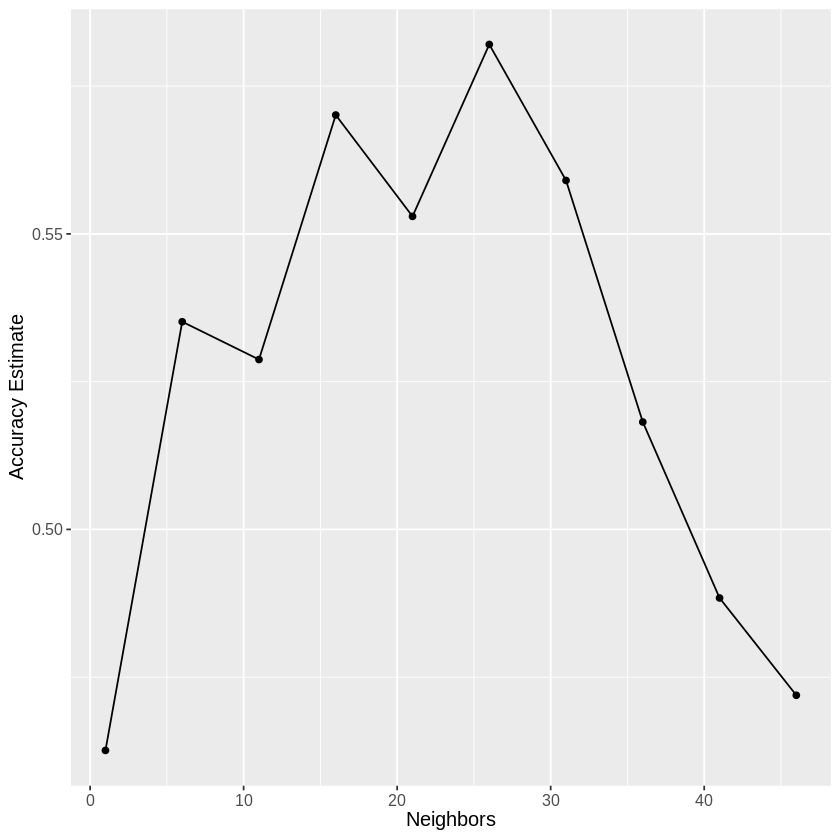

In [78]:
set.seed(1000)
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))

accuracy_vs_k

best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

**Figure 2** Plot of the number of neighbors against accuracy.

Now that we know the best K value, we apply that to our workflow, where we can now predict any value on our testing set. 

In [79]:
set.seed(1000)
cleveland_recipe <- recipe(num ~., data = cleveland_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(cleveland_recipe) |>
  add_model(knn_spec) |>
  fit(data = cleveland)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(26,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4884488
Best kernel: rectangular
Best k: 26

A prediction can be made. For example, if a patient had a blood pressure value of 130 and serum cholesterol value of 400, heart disease is present. These values can be changed to whatever a patient has, and has a 58% chance of predicting it correctly.

In [87]:
cleveland_test_predictions <- predict(knn_fit, cleveland_test) |>
  bind_cols(cleveland_test)

new_obs <- tibble(trestbps = 130, chol = 400)
predict(knn_fit, new_obs)

.pred_class
1 presence

Now, a graph can be created for the dataset that shows how to predict the presence/absence of heart disease.

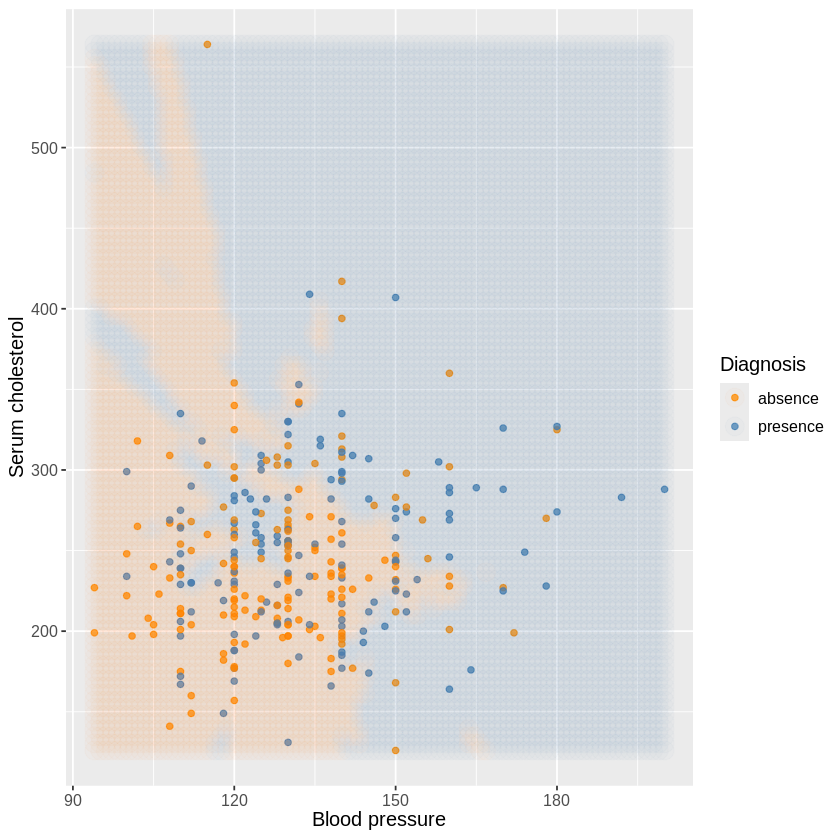

In [88]:
trestbps_grid <- seq(min(cleveland$trestbps),
                max(cleveland$trestbps),
                length.out = 100)
chol_grid <- seq(min(cleveland$chol),
                max(cleveland$chol),
                length.out = 100)
asgrid <- as_tibble(expand.grid(trestbps = trestbps_grid,
                                chol = chol_grid))


knnPredGrid <- predict(knn_fit, asgrid)


prediction_table <- bind_cols(knnPredGrid, asgrid) |>
  rename(num = .pred_class)

test_plot <-
  ggplot() +
  geom_point(data = cleveland,
             mapping = aes(x = trestbps,
                           y = chol,
                           color = num),
             alpha = 0.75) +
  geom_point(data = prediction_table,
             mapping = aes(x = trestbps,
                           y = chol,
                           color = num),
             alpha = 0.02,
             size = 5) +
  labs(color = "Diagnosis",
       x = "Blood pressure",
       y = "Serum cholesterol") +
  scale_color_manual(values = c("darkorange", "steelblue")) +
  theme(text = element_text(size = 12))

test_plot

**Figure 3** Unscaled graph of blood pressure and serum cholesterol where background colour determines the classifiers decision.

**Discussion** 
From this analysis, it was found that the best K value to use for K-NN classification was 26. This was slightly surprising, since figure 3 shows that there may be evidence of overfitting due to the presence of jagged edges. Granted, if the range was increased, an even better K value may be present. The accuracy was also not as high as expected, hovering at around 58%. However, with a larger dataset or more variables contributing to obtaining a label may help to increase the accuracy more. From figure 3, it seems that having a higher blood pressure contributes to the presence of heart disease more than serum cholesterol levels (eg. a blood pressure of 150 and cholesterol of 200 would result in a presence). With this knowledge, lifestyle changes can be made more readily as a preventative technique. This may also lead to more in depth questions, such as how effective certain lifestyle changes are in preventing blood pressure/cholesterol from rising, and what other factors contribute to the presence of heart disease.

**References**

Fuchs, F. D., & Whelton, P. K. (2020). High Blood Pressure and Cardiovascular Disease. *Hypertension (Dallas, Tex. : 1979)*, 75(2), 285–292. https://doi.org/10.1161/HYPERTENSIONAHA.119.14240

Jung, E., Kong, S. Y., Ro, Y. S., Ryu, H. H., & Shin, S. D. (2022). Serum Cholesterol Levels and Risk of Cardiovascular Death: A Systematic Review and a Dose-Response Meta-Analysis of Prospective Cohort Studies. *International journal of environmental research and public health*, 19(14), 8272. https://doi.org/10.3390/ijerph19148272

